In [1]:
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.widgets as widget
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Mercado de Bienes: Consumo, Inversión, Determinación del Precio, y la Política Fiscal

## Modelo Keynesiano: 

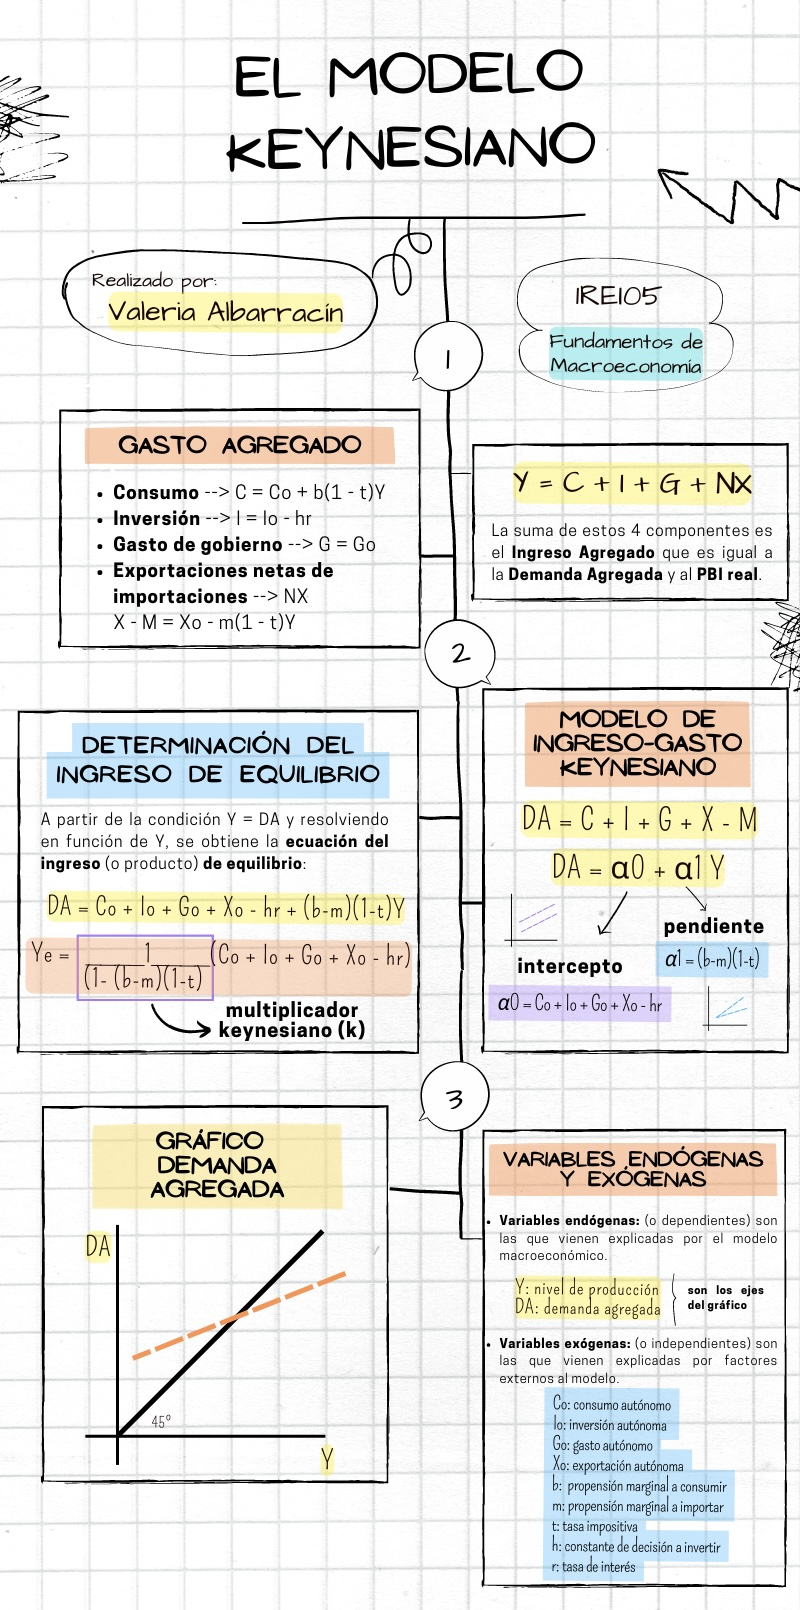

In [3]:
Image('tutorial2.jpg')

## El modelo de Ingreso-Gasto Keynesiano:

La ecuación de equilibrio para el Ingreso Agregado se deriva de la condición de equilibrio donde el ingreso es igual a la demanda agregada: $DA = Y$:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y(b - m)(1 - t) $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = (b - m)(1 - t) $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio a corto plazo es:

$$ Y = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

El ingreso de Equilibrio a corto plazo se grafica de la siguiente forma:

In [10]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [11]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

**Función principal para encontrar los puntos de equilibrio con shock y sin shock**

In [7]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [13]:
# EN EQUILIBRIO
    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(175.9254807692308, 70.37019230769232)

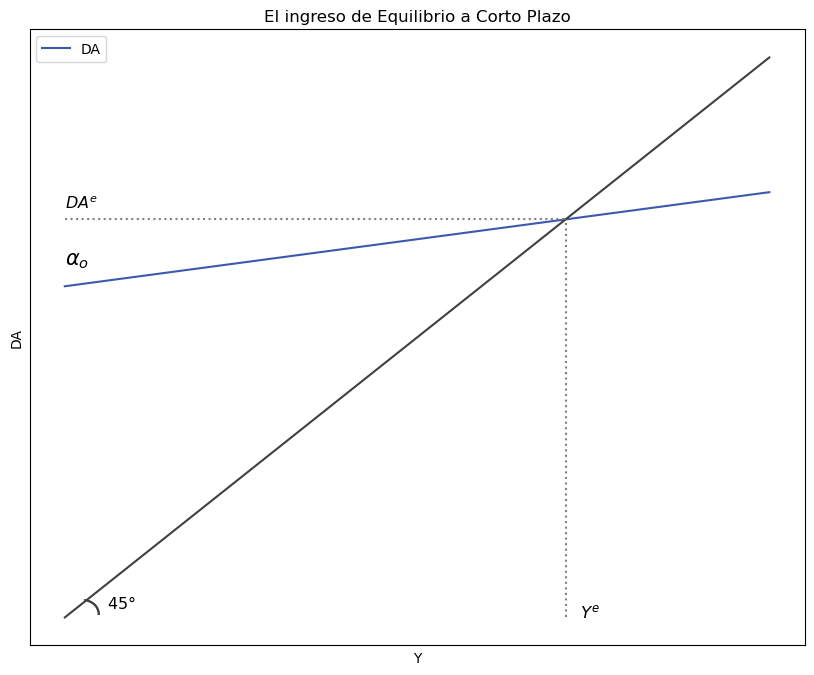

In [14]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
# Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax.plot([min(Y), intersec[1]], [intersec[0], intersec[0]], linestyle=':', color='grey')
# Vertical 
#Empieza el punto minimo hasta llegar al intercepto de manera vertical
ax.plot([intersec[1], intersec[1]], [min(L_45), intersec[0]], linestyle=':', color="grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, intersec[0]+5, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(intersec[1]+2, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, intersec[0]-20, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()

### Estática comparativa del modelo de Ingreso-Gasto Keynesiano:

#### Política Fiscal contractiva con reducción del Gasto del Gobierno $(G_0)$:

In [8]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Ecuación
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

    # Definir SOLO el parámetro cambiado
Go = 35

# Generar la ecuación con el nuevo parámetro
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [9]:
# Recta de 45°
a = 2.5

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

In [10]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

eq_0 = line_intersection((A, B), (C, D))
eq_0 # (y,x)

(175.9254807692308, 70.37019230769232)

In [11]:
# CON SHOCK EN EL GASTO PÚBLICO
    # coordenadas de las curvas (x,y)
A = [DA_G[0], Y[0]] # DA, coordenada inicio
B = [DA_G[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

eq_01 = line_intersection((A, B), (C, D))
eq_01 # (y,x)

(133.8581730769231, 53.54326923076924)

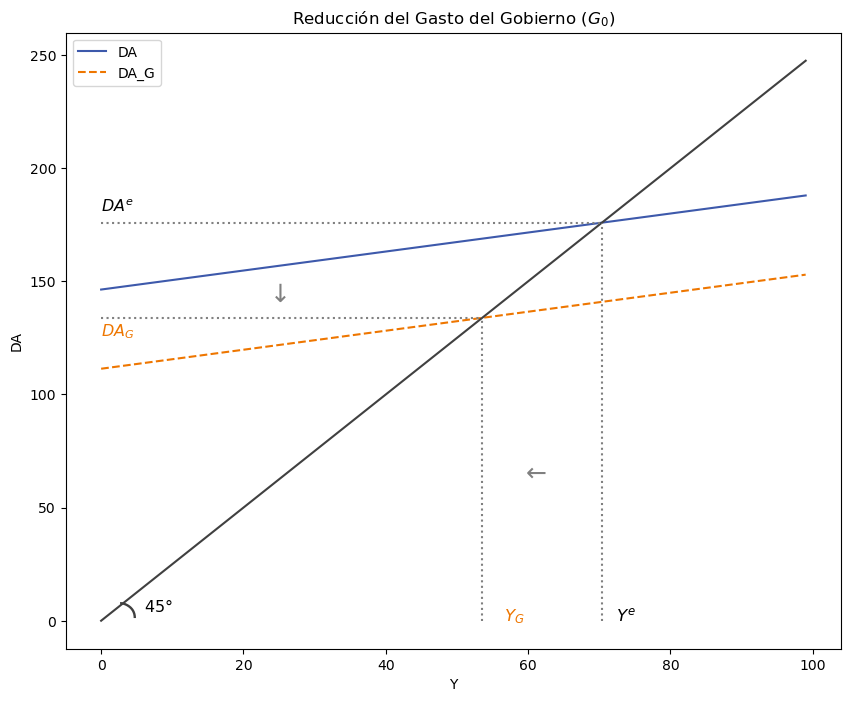

In [12]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(Y, DA_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Líneas punteadas punto de equilibrio
# Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
#ax.plot([min(Y), eq_0[1]], [eq_0[0], eq_0[0]], linestyle=':', color='grey')
ax.plot([min(Y), eq_01[1]], [eq_01[0], eq_01[0]], linestyle=':', color='grey')

# Vertical 
#Empieza el punto minimo hasta llegar al intercepto de manera vertical
#ax.plot([eq_0[1], eq_0[1]], [min(L_45), eq_0[0]], linestyle=':', color="grey")
ax.plot([eq_01[1], eq_01[1]], [min(L_45), eq_01[0]], linestyle=':', color="grey")

# Texto agregado
plt.text(0, eq_0[0]+5, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, eq_01[0]-8, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(eq_0[1]+2, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(eq_01[1]+3, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(eq_01[1]+6, eq_0[1]-8, '$←$', fontsize = 18, color = 'grey')
plt.text(eq_01[1]-30, eq_01[0]+7, '$↓$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Parámetros
Y_size = 100
Y = np.arange(Y_size)
Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8  # b > m
m = 0.2
t = 0.3
r = 0.9

# Ecuaciones de oferta y demanda agregada (usando funciones DA_K y OA_K)
DA = DA(Co, Io, Go, Xo, h, r, b, m, t, Y)
OA = OA(Y, h, b, m, t)

# Punto de equilibrio (suponiendo que ya tienes esta parte)
equilibrio = (valor_Y_equilibrio, valor_DA_equilibrio)

# Llamada a la función para generar el gráfico
generar_grafico_OA_DA(Y, DA, OA, equilibrio)

def generar_grafico_OA_DA(Y, DA, OA, equilibrio):
    # Gráfico
    fig, ax = plt.subplots(figsize=(10, 8))

    # Curvas a graficar
    ax.plot(Y, DA, label="Demanda Agregada", color="#3D59AB")
    ax.plot(Y, OA, label="Oferta Agregada", color="#EE7600")
    
    # Punto de equilibrio
    ax.scatter(equilibrio[1], equilibrio[0], color="red", marker="o", label="Equilibrio")

    # Líneas punteadas punto de equilibrio
    ax.axhline(equilibrio[0], linestyle=":", color="grey")
    ax.axvline(equilibrio[1], linestyle=":", color="grey")

    # Texto agregado
    plt.text(equilibrio[1] + 2, equilibrio[0] + 5, 'Equilibrio', fontsize=11.5, color='red')
    
    # Título y leyenda
    ax.set(title="Modelo OA-DA", xlabel=r'Y', ylabel=r'DA / OA')
    ax.legend()

    plt.show()



NameError: name 'DA' is not defined

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

def OA_K(Y, h, b, m, t):
    OA_K = h + b*(1 - t)*Y - m*Y
    return OA_K

def generar_grafico_OA_DA(Y, DA, OA, equilibrio):
    # Gráfico
    fig, ax = plt.subplots(figsize=(10, 8))

    # Curvas a graficar
    ax.plot(Y, DA, label="Demanda Agregada", color="#3D59AB")
    ax.plot(Y, OA, label="Oferta Agregada", color="#EE7600")
    
    # Punto de equilibrio
    ax.scatter(equilibrio[1], equilibrio[0], color="red", marker="o", label="Equilibrio")

    # Líneas punteadas punto de equilibrio
    ax.axhline(equilibrio[0], linestyle=":", color="grey")
    ax.axvline(equilibrio[1], linestyle=":", color="grey")

    # Texto agregado
    plt.text(equilibrio[1] + 2, equilibrio[0] + 5, 'Equilibrio', fontsize=11.5, color='red')
    
    # Título y leyenda
    ax.set(title="Modelo OA-DA", xlabel=r'Y', ylabel=r'DA / OA')
    ax.legend()

    plt.show()

# Parámetros
Y_size = 100
Y = np.arange(Y_size)
Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8  # b > m
m = 0.2
t = 0.3
r = 0.9

# Ecuaciones de oferta y demanda agregada
DA = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)
OA = OA_K(Y, h, b, m, t)

# Punto de equilibrio (suponiendo que ya tienes esta parte)
equilibrio = (valor_Y_equilibrio, valor_DA_equilibrio)

# Llamada a la función para generar el gráfico
generar_grafico_OA_DA(Y, DA, OA, equilibrio)


NameError: name 'valor_Y_equilibrio' is not defined

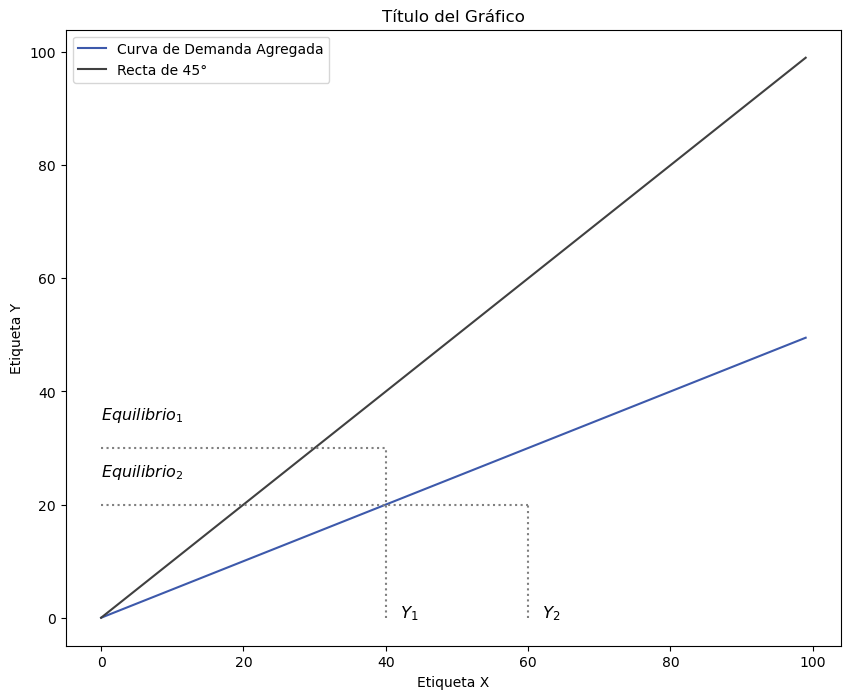

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model(DA_function, L_45_function, equilibrium_points, title, xlabel, ylabel):
    """
    Función para generar gráficos de modelos económicos.

    Parámetros:
    - DA_function: Función de la curva de demanda agregada.
    - L_45_function: Función de la recta de 45 grados.
    - equilibrium_points: Lista de puntos de equilibrio (tuplas (y, x)).
    - title: Título del gráfico.
    - xlabel: Etiqueta del eje X.
    - ylabel: Etiqueta del eje Y.

    Retorna:
    None (muestra el gráfico).
    """
    # Generar valores para el eje Y
    Y_size = 100
    Y = np.arange(Y_size)

    # Calcular valores de las funciones
    DA_curve = DA_function(Y)
    L_45_curve = L_45_function(Y)

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(10, 8))

    # Curvas a graficar
    ax.plot(Y, DA_curve, label="Curva de Demanda Agregada", color="#3D59AB")
    ax.plot(Y, L_45_curve, label="Recta de 45°", color="#404040")

    # Líneas punteadas punto de equilibrio
    for equilibrium_point in equilibrium_points:
        ax.plot([min(Y), equilibrium_point[1]], [equilibrium_point[0], equilibrium_point[0]], linestyle=':', color='grey')
        ax.plot([equilibrium_point[1], equilibrium_point[1]], [min(L_45_curve), equilibrium_point[0]], linestyle=':', color='grey')

    # Texto agregado
    for idx, equilibrium_point in enumerate(equilibrium_points):
        plt.text(0, equilibrium_point[0] + 5, f'$Equilibrio_{idx+1}$', fontsize=11.5, color='black')
        plt.text(equilibrium_point[1] + 2, 0, f'$Y_{idx+1}$', fontsize=12, color='black')

    # Título y leyenda
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.legend()

    plt.show()

# Ejemplo de uso:
# Define las funciones específicas del modelo y los puntos de equilibrio

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K


def L_45(a, Y):
    L_45 = a*Y
    return L_45

#equilibrium_points = [(30, 40), (20, 60)]  # Ejemplo, ajusta según tu modelo

# Llama a la función plot_model con las funciones específicas y parámetros
plot_model(DA_function, L_45_function, equilibrium_points, "Título del Gráfico", "Etiqueta X", "Etiqueta Y")


In [28]:
import numpy as np
import matplotlib.pyplot as plt

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K
a = 2.5
def L_45(a, Y):
    L_45 = a * Y
    return L_45

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

def plot_equilibrium(Co, Io, Go, Xo, h, b, m, t, r, Y_size=100, a=2.5):
    Y = np.arange(Y_size)

    DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

    # NUEVA curva de ingreso de equilibrio
    Go = 35
    DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

    L_45 = L_45(a, Y)

    # EN EQUILIBRIO
    A = [DA_IS_K[0], Y[0]]
    B = [DA_IS_K[-1], Y[-1]]
    C = [L_45[0], Y[0]]
    D = [L_45[-1], Y[-1]]
    eq_0 = line_intersection((A, B), (C, D))

    # CON SHOCK EN EL GASTO PÚBLICO
    A = [DA_G[0], Y[0]]
    B = [DA_G[-1], Y[-1]]
    eq_01 = line_intersection((A, B), (C, D))

    # Gráfico
    y_max = np.max(DA_IS_K)
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(Y, DA_IS_K, label="DA", color="#3D59AB")  # curva ORIGINAL
    ax.plot(Y, DA_G, label="DA_G", color="#EE7600", linestyle='dashed')  # NUEVA curva
    ax.plot(Y, L_45, color="#404040")  # línea de 45º

    ax.plot([min(Y), eq_0[1]], [eq_0[0], eq_0[0]], linestyle=':', color='grey')
    ax.plot([min(Y), eq_01[1]], [eq_01[0], eq_01[0]], linestyle=':', color='grey')

    ax.plot([eq_0[1], eq_0[1]], [min(L_45), eq_0[0]], linestyle=':', color="grey")
    ax.plot([eq_01[1], eq_01[1]], [min(L_45), eq_01[0]], linestyle=':', color="grey")

    plt.text(0, eq_0[0] + 5, '$DA^e$', fontsize=11.5, color='black')
    plt.text(0, eq_01[0] - 8, '$DA_G$', fontsize=11.5, color='#EE7600')
    plt.text(6, 4, '$45°$', fontsize=11.5, color='black')
    plt.text(2.5, -3, '$◝$', fontsize=30, color='#404040')
    plt.text(eq_0[1] + 2, 0, '$Y^e$', fontsize=12, color='black')
    plt.text(eq_01[1] + 3, 0, '$Y_G$', fontsize=12, color='#EE7600')
    plt.text(eq_01[1] + 6, eq_0[1] - 8, '$←$', fontsize=18, color='grey')
    plt.text(eq_01[1] - 30, eq_01[0] + 7, '$↓$', fontsize=18, color='grey')

    ax.set(title="Reducción del Gasto del Gobierno $(G_0)$", xlabel=r'Y', ylabel=r'DA')
    ax.legend()

    plt.show()

# Ejemplo de uso:
plot_equilibrium(Co, Io, Go, Xo, h, b, m, t, r)


UnboundLocalError: cannot access local variable 'L_45' where it is not associated with a value

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

def L_45(a, Y):
    L_45 = a * Y
    return L_45

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

def plot_equilibrium(Co, Io, Go, Xo, h, b, m, t, r, Y_size=100, a=2.5):
    Y = np.arange(Y_size)

    DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

    # NUEVA curva de ingreso de equilibrio
    Go = 35
    DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

    L_45 = L_45(a, Y)

    # EN EQUILIBRIO
    A = [DA_IS_K[0], Y[0]]
    B = [DA_IS_K[-1], Y[-1]]
    C = [L_45[0], Y[0]]
    D = [L_45[-1], Y[-1]]
    eq_0 = line_intersection((A, B), (C, D))

    # CON SHOCK EN EL GASTO PÚBLICO
    A = [DA_G[0], Y[0]]
    B = [DA_G[-1], Y[-1]]
    eq_01 = line_intersection((A, B), (C, D))

    # Gráfico
    y_max = np.max(DA_IS_K)
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(Y, DA_IS_K, label="DA", color="#3D59AB")  # curva ORIGINAL
    ax.plot(Y, DA_G, label="DA_G", color="#EE7600", linestyle='dashed')  # NUEVA curva
    ax.plot(Y, L_45, color="#404040")  # línea de 45º

    ax.plot([min(Y), eq_0[1]], [eq_0[0], eq_0[0]], linestyle=':', color='grey')
    ax.plot([min(Y), eq_01[1]], [eq_01[0], eq_01[0]], linestyle=':', color='grey')

    ax.plot([eq_0[1], eq_0[1]], [min(L_45), eq_0[0]], linestyle=':', color="grey")
    ax.plot([eq_01[1], eq_01[1]], [min(L_45), eq_01[0]], linestyle=':', color="grey")

    plt.text(0, eq_0[0] + 5, '$DA^e$', fontsize=11.5, color='black')
    plt.text(0, eq_01[0] - 8, '$DA_G$', fontsize=11.5, color='#EE7600')
    plt.text(6, 4, '$45°$', fontsize=11.5, color='black')
    plt.text(2.5, -3, '$◝$', fontsize=30, color='#404040')
    plt.text(eq_0[1] + 2, 0, '$Y^e$', fontsize=12, color='black')
    plt.text(eq_01[1] + 3, 0, '$Y_G$', fontsize=12, color='#EE7600')
    plt.text(eq_01[1] + 6, eq_0[1] - 8, '$←$', fontsize=18, color='grey')
    plt.text(eq_01[1] - 30, eq_01[0] + 7, '$↓$', fontsize=18, color='grey')

    ax.set(title="Reducción del Gasto del Gobierno $(G_0)$", xlabel=r'Y', ylabel=r'DA')
    ax.legend()

    plt.show()

# Ejemplo de uso:
plot_equilibrium(Co, Io, Go, Xo, h, b, m, t, r)


UnboundLocalError: cannot access local variable 'L_45' where it is not associated with a value

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def funcion_graficos(versión, lista_variables):
    # Comprobación de versión válida
    if versión not in [1, 2, 3, 4]:
        print("Versión no válida. Por favor, elija una versión válida (1, 2, 3, 4).")
        return

    # Seleccionar variables según la versión
    if versión == 1:
        Y = lista_variables[0]
        r = lista_variables[1]
        i = lista_variables[2]
        Ms = lista_variables[3]
        
        # Resto del código para el modelo IS-LM usando Y, r, i, Ms

        # Ejemplo:
        plt.plot(Y, r, label="Curva IS")
        plt.plot(Y, i, label="Curva LM")
        plt.xlabel("Y")
        plt.ylabel("r")
        plt.legend()
        plt.title("Modelo IS-LM")
        plt.show()

    elif versión == 2:
        # Código para el modelo DA usando variables específicas

    elif versión == 3:
        # Código para el modelo OA usando variables específicas

    elif versión == 4:
        # Código para el modelo MR usando variables específicas

# Ejemplo de uso:
# Supongamos que tienes las variables Y, r, i, Ms almacenadas en una lista llamada lista_variables
funcion_graficos(1, lista_variables)


IndentationError: expected an indented block after 'elif' statement on line 28 (325050425.py, line 31)

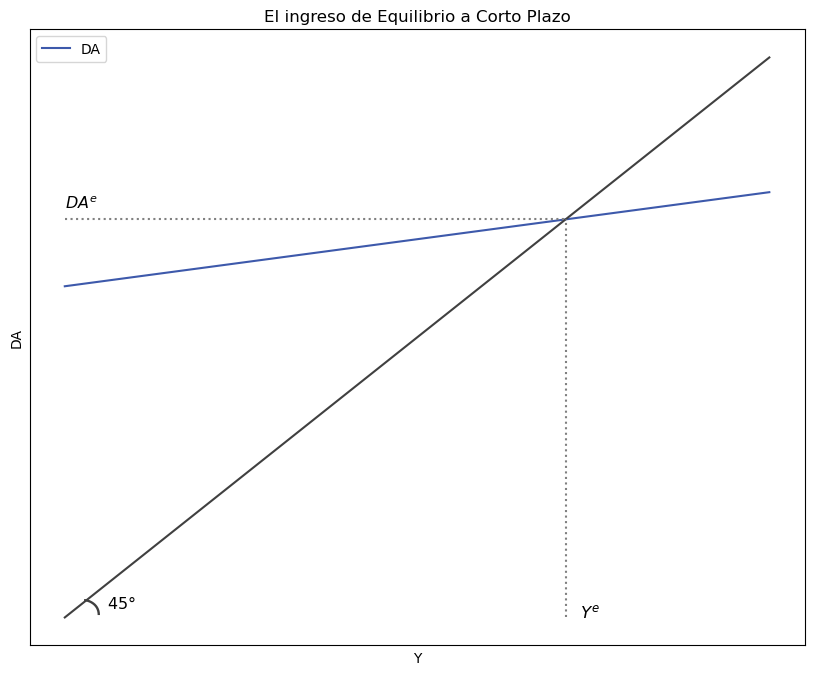

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_equilibrium_curve(Y, DA_curve, L_45_curve, equilibrium_point, title="Gráfico de Equilibrio"):
    """
    Función para graficar la curva de equilibrio y marcar el punto de equilibrio en un gráfico.

    Parámetros:
    - Y: Array, valores del eje Y.
    - DA_curve: Array, valores de la curva de demanda agregada.
    - L_45_curve: Array, valores de la curva de 45 grados.
    - equilibrium_point: Tupla (y, x), coordenadas del punto de equilibrio.
    - title: String, título del gráfico.

    Retorna:
    None (muestra el gráfico).
    """
    y_max = np.max(DA_curve)
    fig, ax = plt.subplots(figsize=(10, 8))

    # Curvas a graficar
    ax.plot(Y, DA_curve, label="DA", color="#3D59AB")  # Curva de demanda agregada
    ax.plot(Y, L_45_curve, color="#404040")  # Línea de 45 grados

    # Eliminar las cantidades de los ejes
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())

    # Líneas punteadas punto de equilibrio
    # Horizontal
    ax.plot([min(Y), equilibrium_point[1]], [equilibrium_point[0], equilibrium_point[0]], linestyle=':', color='grey')
    # Vertical
    ax.plot([equilibrium_point[1], equilibrium_point[1]], [min(L_45_curve), equilibrium_point[0]], linestyle=':', color="grey")

    # Texto agregado
    plt.text(0, equilibrium_point[0] + 5, '$DA^e$', fontsize=11.5, color='black')
    plt.text(equilibrium_point[1] + 2, 0, '$Y^e$', fontsize=12, color='black')
    plt.text(6, 4, '$45°$', fontsize=11.5, color='black')
    plt.text(2.5, -3, '$◝$', fontsize=30, color='#404040')

    # Título y leyenda
    ax.set(title=title, xlabel=r'Y', ylabel=r'DA')
    ax.legend()

    plt.show()

# Ejemplo de uso:
# Supongamos que tienes las variables Y, DA_IS_K, y L_45 almacenadas en variables
equilibrium_point = eq_0  # Cambia esto con el punto de equilibrio correcto
plot_equilibrium_curve(Y, DA_IS_K, L_45, equilibrium_point, "El ingreso de Equilibrio a Corto Plazo")


In [20]:
import matplotlib.pyplot as plt
import numpy as np

def funcion_graficos(version, lista_variables):
    """
    Función para generar gráficos de diferentes modelos económicos.

    Parámetros:
    - version: int, versión del modelo (1 para IS-LM, 2 para DA, 3 para OA, 4 para MR).
    - lista_variables: list, lista de objetos que almacenan información sobre variables macroeconómicas.

    Retorna:
    None (muestra el gráfico).
    """
    # Lógica para determinar qué variables utilizar según la versión
    if version == 1:
        # Recuperar las variables específicas para el modelo IS-LM
        Y = lista_variables[0]
        LM_curve = lista_variables[1]
        IS_curve = lista_variables[2]
        equilibrium_point = lista_variables[3]

        # Lógica adicional si es necesario para este modelo específico...

        # Llamar a la función para graficar
        plot_is_lm_model(Y, LM_curve, IS_curve, equilibrium_point)

   # elif version == 2:
        # Lógica para el modelo DA...

   # elif version == 3:
        # Lógica para el modelo OA...

  #  elif version == 4:
        # Lógica para el modelo MR...

    else:
        print("Versión no válida. Selecciona una versión válida (1, 2, 3, o 4).")

def plot_is_lm_model(Y, LM_curve, IS_curve, equilibrium_point):
    """
    Función para graficar el modelo IS-LM.

    Parámetros:
    - Y: Array, valores del eje Y.
    - LM_curve: Array, valores de la curva LM.
    - IS_curve: Array, valores de la curva IS.
    - equilibrium_point: Tupla (y, x), coordenadas del punto de equilibrio.

    Retorna:
    None (muestra el gráfico).
    """
    # Lógica para graficar el modelo IS-LM...

    # Ejemplo de código (adáptalo según tus necesidades)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(Y, LM_curve, label="LM Curve", color="blue")
    ax.plot(Y, IS_curve, label="IS Curve", color="red")
    ax.scatter(equilibrium_point[1], equilibrium_point[0], color="green", marker="o", label="Equilibrium Point")
    ax.legend()
    ax.set(title="IS-LM Model", xlabel="Y", ylabel="Interest Rate")
    plt.show()

# Ejemplo de uso:
# Supongamos que tienes una lista de variables que corresponden al modelo IS-LM
# Asegúrate de adaptar este ejemplo según las variables reales que estés utilizando.
lista_variables_is_lm = [Y, LM_curve, IS_curve, equilibrium_point]
funcion_graficos(1, lista_variables_is_lm)


NameError: name 'LM_curve' is not defined

In [20]:
# Gráfico con movimiento

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Definir ecuación y gráfico para el parámetro específico
def DA_K(Go): # ecuación
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(Y, DA_K, label = "DA", color = "#3D59AB") #Demanda agregada
    plt.plot(Y, L_45, color = "#404040")
    plt.title('Gasto de Gobierno')
    plt.legend()    
    
    # crear gráfico con movimiento/control
Go_slide = widgets.FloatSlider(value = 70, min = 0, max = 110)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(DA_K, Go = Go_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=70.0, description='Go', max=110.0), Output()), _dom_classes=('widget-i…

<function __main__.DA_K(Go)>

- Intuición: 

$$ ↓Go → ↓DA → DA < Y → ↓Y $$

In [25]:
# Gráfico de causalidad

sprinkler = CausalGraphicalModel(nodes=["Go ↓","DA ↓","Y ↓"],
                                 edges=[("Go ↓","DA ↓"), ("DA ↓","Y ↓")])
sprinkler.draw()


NameError: name 'CausalGraphicalModel' is not defined

- Matemáticamente: $∆G_0 < 0  →  ¿∆Y?$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

o, considerando el multiplicador keynesiano, $ k > 0 $:

$$ Y = k (C_0 + I_0 + G_0 + X_0 - hr) $$


$$ ∆Y = k (∆C_0 + ∆I_0 + ∆G_0 + ∆X_0 - ∆hr) $$

Pero, si no ha habido cambios en $C_0$, $I_0$, $X_0$, $h$ ni $r$, entonces: 

$$∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r = 0$$

$$ ∆Y = k (∆G_0) $$


Sabiendo que $∆G_0 < 0 $ y que $k > 0$, la multiplicación de un número negativo con un positivo dará otro negativo:

$$ ∆Y = (+)(-) $$
$$ ∆Y < 0 $$

In [26]:
# Diferenciales

    # nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t = symbols('Co Io Go Xo h r b m t')

    # determinar ecuación
f = (Co + Io + Go + Xo - h*r)/(1-(b-m)*(1-t))

    # función diferencial
df_Go = diff(f, Go) # diff(función, variable_analizar
df_Go #∆Y/∆Go

1/(-(1 - t)*(b - m) + 1)

#### Política fiscal expansiva con una reducción de la Tasa de Tributación $(t)$:

In [21]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

    # Parámetros
Y_size = 100

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3 #tasa de tributación
r = 0.9

Y = np.arange(Y_size)

    # Ecuación
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

    # Definir SOLO el parámetro cambiado
t = 0.01

# Generar la ecuación con el nuevo parámetros
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_t = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [22]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(175.9254807692308, 70.37019230769232)

In [23]:
# CON SHOCK EN LA TASA IMPOSITIVA
    # coordenadas de las curvas (x,y)
A = [DA_t[0], Y[0]] # DA, coordenada inicio
B = [DA_t[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec2 = line_intersection((A, B), (C, D))
intersec2 # (y,x)

(191.98583420776498, 76.79433368310599)

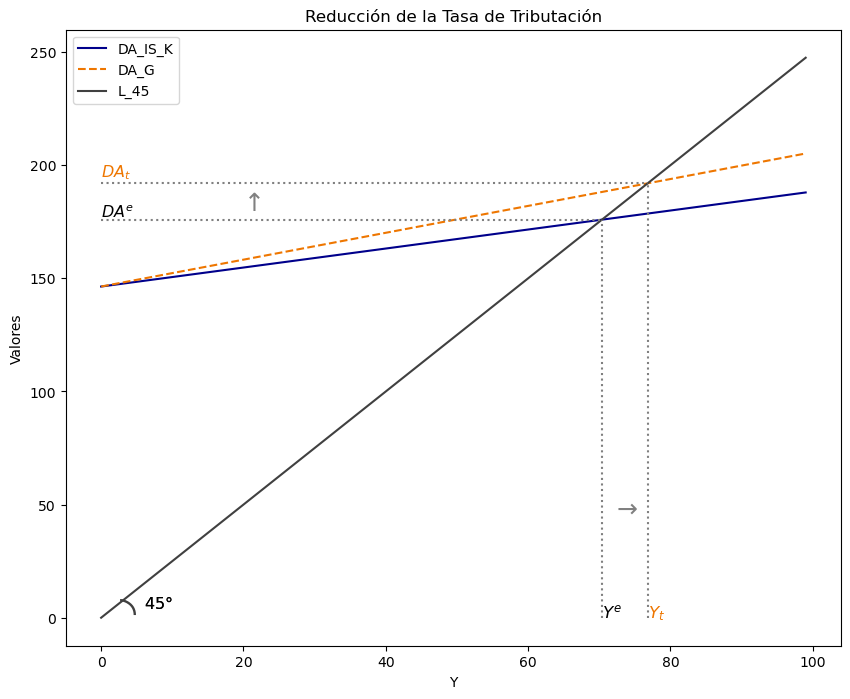

In [24]:
# Gráfico
fig, ax = plt.subplots(figsize=(10, 8))  # Ajusta el tamaño del gráfico

# Trazar las curvas DA_IS_K y DA_G
plt.plot(Y, DA_IS_K, label='DA_IS_K', linestyle='-',color = "#00008B")
plt.plot(Y, DA_t, label='DA_G', linestyle='--', color = '#EE7600')

plt.text(0, 177, '$DA^e$', fontsize=11.5, color='black')
plt.text(0, 195, '$DA_t$', fontsize=11.5, color = '#EE7600')

# Trazar la curva L_45
plt.plot(Y, L_45, label='L_45', linestyle='-', color = "#404040")
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')

# Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax.plot([min(Y), intersec[1]], [intersec[0], intersec[0]], linestyle=':', color='grey')
ax.plot([min(Y), intersec2[1]], [intersec2[0], intersec2[0]], linestyle=':', color='grey')

# Vertical 
#Empieza el punto minimo hasta llegar al intercepto de manera vertical
ax.plot([intersec[1], intersec[1]], [min(L_45), intersec[0]], linestyle=':', color="grey")
ax.plot([intersec2[1], intersec2[1]], [min(L_45), intersec2[0]], linestyle=':', color="grey")

# Texto agregado
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(intersec[1], 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(intersec2[1], 0, '$Y_t$', fontsize = 12, color = '#EE7600')
plt.text(intersec[1]+2, intersec[1]-25, '$→$', fontsize = 18, color = 'grey')
plt.text(20, intersec2[0]-12, '$↑$', fontsize = 18, color = 'grey')

# Etiquetas y leyenda
plt.title('Reducción de la Tasa de Tributación')
plt.xlabel('Y')
plt.ylabel('Valores')
plt.legend()

# Mostrar el gráfico
plt.grid(False)  # Opcional: agregar una cuadrícula al gráfico
plt.show()

In [21]:
# Gráfico con movimiento

# Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Definir ecuación y gráfico para el parámetro específico
def DA_K(t): # ecuación
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(Y, DA_K, label = "DA", color = "#3D59AB") #Demanda agregada
    plt.plot(Y, L_45, color = "#404040")
    plt.title('Tasa de Tributación')
    plt.legend()    
    
    # crear gráfico con movimiento/control
t_slide = widgets.FloatSlider(value = 0.5, min = 0, max = 3)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(DA_K, t = t_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=0.5, description='t', max=3.0), Output()), _dom_classes=('widget-inter…

<function __main__.DA_K(t)>

- Intuición: ¿contradicción?

$$ t↓ → Co↑ → DA↑ → DA > Y → Y↑ $$
$$ t↓ → M↑ → DA↓ → DA < Y → Y↓ $$


- Matemáticamente: $∆t < 0  →  ¿∆Y?$

In [35]:
Co, Io, Go, Xo, h, r, b, m, t = symbols('Co Io Go Xo h r b m t')

f = (Co + Io + Go + Xo - h*r)/(1-(b-m)*(1-t))

df_t = diff(f, t)
df_t #∆Y/∆t

(-b + m)*(Co + Go + Io + Xo - h*r)/(-(1 - t)*(b - m) + 1)**2

Considernado el diferencial de $∆t$:

$$ \frac{∆Y}{∆t} = \frac{(m-b)(Co + Go + Io + Xo - hr)}{(1-(1-t)(b-m)+1)^2} $$

- Sabiendo que b > m, entonces $(m-b) < 0$
- Los componentes autónomos no cambian: $∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r = 0$
- Cualquier número elevado al cuadrado será positivo: $ (1-(1-t)(b-m)+1)^2 > 0 $

Entonces:

$$ \frac{∆Y}{∆t} = \frac{(-)}{(+)} $$

Dado que $∆t < 0$, la división de dos positivos da otro positivo:

$$ \frac{∆Y}{(-)} = \frac{(-)}{(+)} $$

$$ ∆Y = \frac{(-)(-)}{(+)} $$

$$ ∆Y > 0 $$


-----------

## Ejercicios:

### Derive y grafique la función de demanda de Consumo.

In [23]:
# Parámetros

Y_size = 100 

Co = 35
b = 0.8
t = 0.3

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def C(Co, b, t, Y):
    C = Co + b*(1-t)*Y
    return C

C = C(Co, b, t, Y)

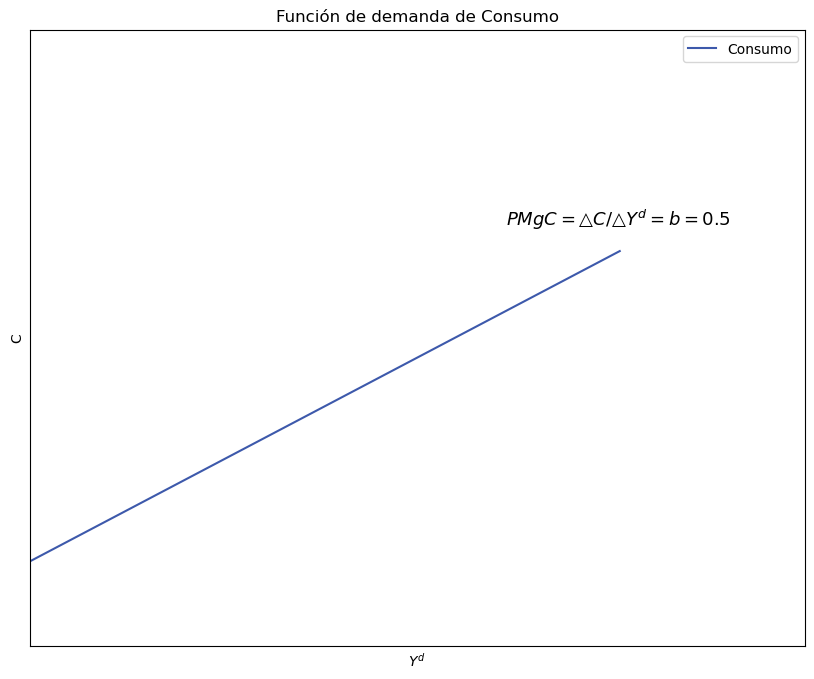

In [24]:
# Gráfico
#
# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

custom_xlim = (0, 130)
custom_ylim = (20, 130)

plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)


# Curvas a graficar
ax.plot(Y, C, label = "Consumo", color = "#3D59AB") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto agregado
    # punto de equilibrio
plt.text(80, 95, '$PMgC = △C/△Y^d = b = 0.5$', fontsize = 13, color = 'black')


# Título y leyenda
ax.set(title="Función de demanda de Consumo", xlabel= '$Y^d$', ylabel= 'C')
ax.legend() #mostrar leyenda

plt.show()

### Derive y grafique la función de demanda de Inversión.

In [25]:
# Parámetros

Io = 40
h = 0.7

r = np.arange(start = 0.01, stop = 1, step =0.01)  
r

# Ecuación de la curva del ingreso de equilibrio

def I(Io, h, r):
    I = Io - h*r
    return I

I = I(Io, h, r)

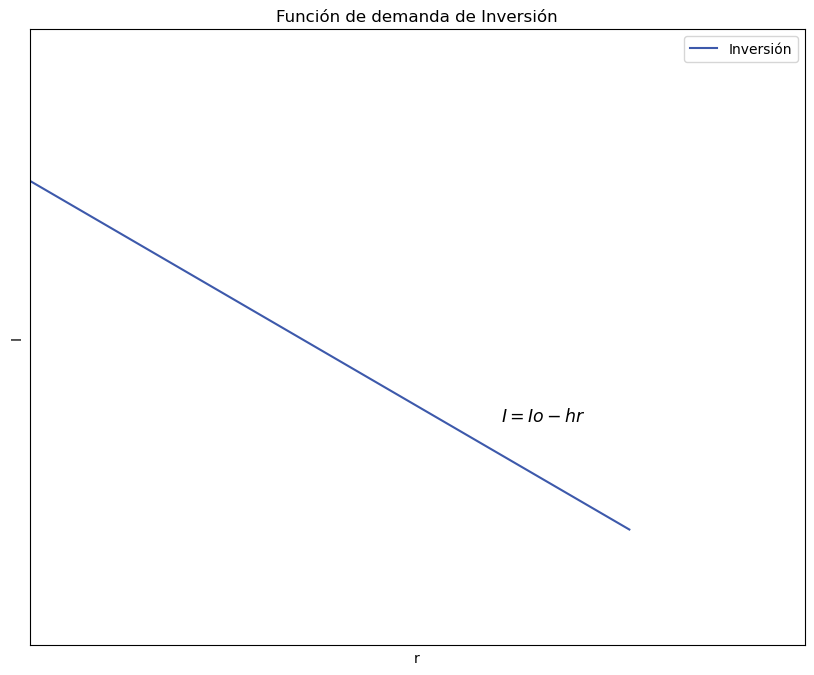

In [26]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

custom_xlim = (0.1, 1.25)
custom_ylim = (39.1, 40.2)

plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)


# Curvas a graficar
ax.plot(r, I, label = "Inversión", color = "#3D59AB") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto agregado
    # punto de equilibrio
plt.text(0.8, 39.5, '$I = Io - hr$', fontsize = 12.5, color = 'black')


# Título y leyenda
ax.set(title="Función de demanda de Inversión", xlabel= 'r', ylabel= 'I')
ax.legend() #mostrar leyenda

plt.show()

### ¿Cuáles son los supuestos del modelo Ingreso-Gasto Keynesiano?

1) Es un modelo de corto plazo.

2) El nivel de precios es rígido o fijo.

3) El nivel del producción $(Y)$ se adapta a los cambios de la Demanda Agregada $(DA)$.

4) La tasa de interés $(r)$ se determina afuera del modelo de Ingreso-Gasto. Se da en el mercado monetario $(LM)$.

### Encuentre y grafique el nivel de Ingreso de equilibrio $Y^e$ del modelo Ingreso-Gasto Keynesiano:

La ecuación de equilibrio para el Ingreso se deriva de la condición de equilibrio donde el nivel de producción es igual a la Demanda Agregada: $DA = Y$:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y(b - m)(1 - t) $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = (b - m)(1 - t) $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio a corto plazo es:

$$ Y^e = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y^e = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

Donde $\frac{1}{1 - (b - m)(1 - t)}$ es el multiplicador keynesiano $(k)$.

In [27]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [28]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

In [29]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

Equi = line_intersection((A, B), (C, D))
Equi # (y,x)

(175.9254807692308, 70.37019230769232)

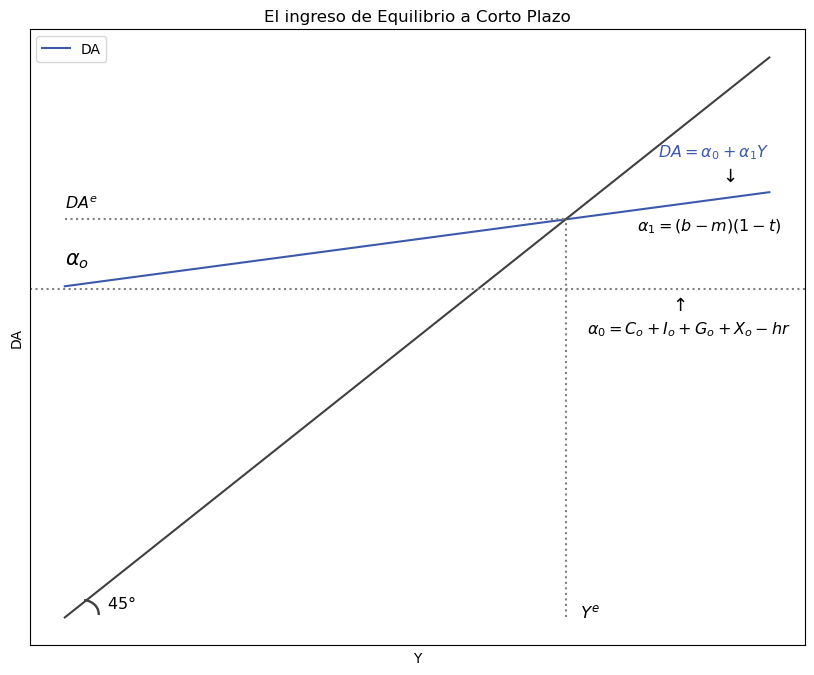

In [30]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
# Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax.plot([min(Y), Equi[1]], [Equi[0], Equi[0]], linestyle=":", color = "grey")
# Vertical
#Empieza el punto minimo hasta llegar al intercepto de manera vertical
ax.plot([Equi[1], Equi[1]], [min(L_45), Equi[0]], linestyle=':', color="grey")
plt.axhline(y=145, xmin= 0, xmax= 1, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, Equi[0]+5, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(Equi[1]+2, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, Equi[0]-20, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
    # ecuaciones
plt.text(Equi[1]+13,Equi[0]+28, '$DA = α_0 + α_1 Y$', fontsize = 11.5, color = '#3D59AB')
plt.text(Equi[1]+10, Equi[0]-5, '$α_1 = (b-m)(1-t)$', fontsize = 11.5, color = 'black')
plt.text(Equi[1]+3, Equi[1]+55, '$α_0 = C_o + I_o + G_o + X_o - hr$', fontsize = 11.5, color = 'black')

plt.text(Equi[1]+22, Equi[0]+17, '$↓$', fontsize = 13, color = 'black')
plt.text(Equi[1]+15, Equi[0]-40, '$↑$', fontsize = 13, color = 'black')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()

### El modelo de Ingreso-Gasto keynesiano con Regla Contracíclica:

#### Grafique la Funcion de demanda Agregada y la recta de 45 grados señalando los valores de intercepto y pendiente

In [31]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
g = 0.2 #solo valores entre 0-0.4
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)

In [32]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [DA_Cont[0], Y[0]] # DA, coordenada inicio
B = [DA_Cont[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

Equi = line_intersection((A, B), (C, D))
Equi # (y,x)

(160.4934210526316, 64.19736842105264)

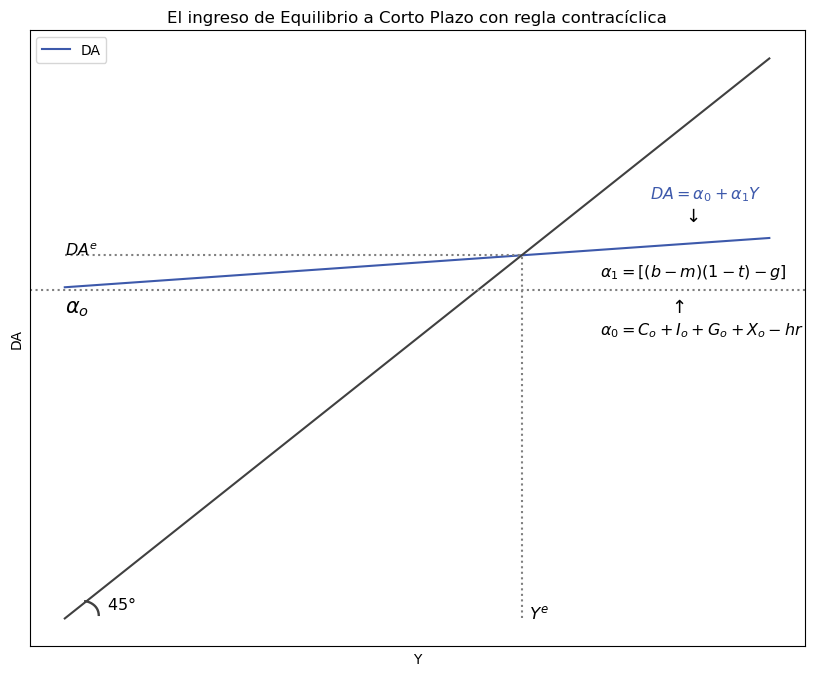

In [33]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
# Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax.plot([min(Y), Equi[1]], [Equi[0], Equi[0]], linestyle=":", color = "grey")

# Vertical
#Empieza el punto minimo hasta llegar al intercepto de manera vertical
ax.plot([Equi[1], Equi[1]], [min(L_45), Equi[0]], linestyle=':', color="grey")
plt.axhline(y=145, xmin= 0, xmax= 1, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, Equi[0], '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(Equi[1]+1, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, Equi[1]+71, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
    # ecuaciones
plt.text(Equi[1]+18, Equi[0]+25, '$DA = α_0 + α_1 Y$', fontsize = 11.5, color = '#3D59AB')
plt.text(Equi[1]+11, Equi[0]-9, '$α_1 = [(b-m)(1-t)-g]$', fontsize = 11.5, color = 'black')
plt.text(Equi[1]+11, Equi[0]-35, '$α_0 = C_o + I_o + G_o + X_o - hr$', fontsize = 11.5, color = 'black')

plt.text(Equi[1]+23, Equi[0]+15, '$↓$', fontsize = 13, color = 'black')
plt.text(Equi[1]+21, Equi[0]-25, '$↑$', fontsize = 13, color = 'black')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo con regla contracíclica", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()

#### Encuentre el nivel de Ingreso de Equilibrio

La ecuación de equilibrio para el Ingreso se deriva de la condición de equilibrio donde el nivel de producción es igual a la Demanda Agregada: $DA = Y$:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 - gY $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y[(b - m)(1 - t) - g] $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = [(b - m)(1 - t) - g] $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio a corto plazo es:

$$ Y^e = \frac{1}{1 - (b - m)(1 - t) + g} (C_0 + I_0 + G_0 + X_0 - hr) $$

#### Analice una Política Fiscal Expansiva con aumento del Gasto del Gobierno

- Intuición: 

$$ ↑Go → ↑DA → DA > Y → ↑Y $$

- Matemáticamente: $∆G_0 < 0  →  ¿∆Y?$

In [27]:
# Diferenciales

    # nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, g = symbols('Co Io Go Xo h r b m t g')

    # determinar ecuación
f = (Co + Io + Go + Xo - h*r)/(1 - (b - m)*(1 - t) + g)

    # función diferencial
df_Go = diff(f, Go) # diff(función, variable_analizar
df_Go #∆Y/∆Go

1/(g - (1 - t)*(b - m) + 1)

Considernado el diferencial obtenido:

$$ \frac{∆Y}{∆Go} = \frac{1}{1 - (b - m)(1 - t) + g} $$

Sabiendo que al multiplicador keynesiano $(k > 0)$ se le adiciona el parámetro $g$, el denominador continuará siendo positivo (aunque más grande y con una pendiente de curva reducida).

Y considerando que $∆G_0 > 0 $, la multiplicación de un número positivo con otro positivo dará un positivo:

$$ \frac{∆Y}{(+)} = (+) $$
$$ ∆Y = (+)(+) $$
$$ ∆Y > 0 $$

- Gráficamente:

In [81]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9
g = 0.2

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


# Nueva curva

Go = 100

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_C_G = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


In [82]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

In [83]:
    # coordenadas de las curvas (x,y)
A = [DA_Cont[0], Y[0]] # DA, coordenada inicio
B = [DA_Cont[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

E = line_intersection((A, B), (C, D))
E # (y,x)

(160.4934210526316, 64.19736842105264)

In [84]:
    # coordenadas de las curvas (x,y)
A = [DA_C_G[0], Y[0]] # DA, coordenada inicio
B = [DA_C_G[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

E_1 = line_intersection((A, B), (C, D))
E_1 # (y,x)

(193.38815789473685, 77.35526315789474)

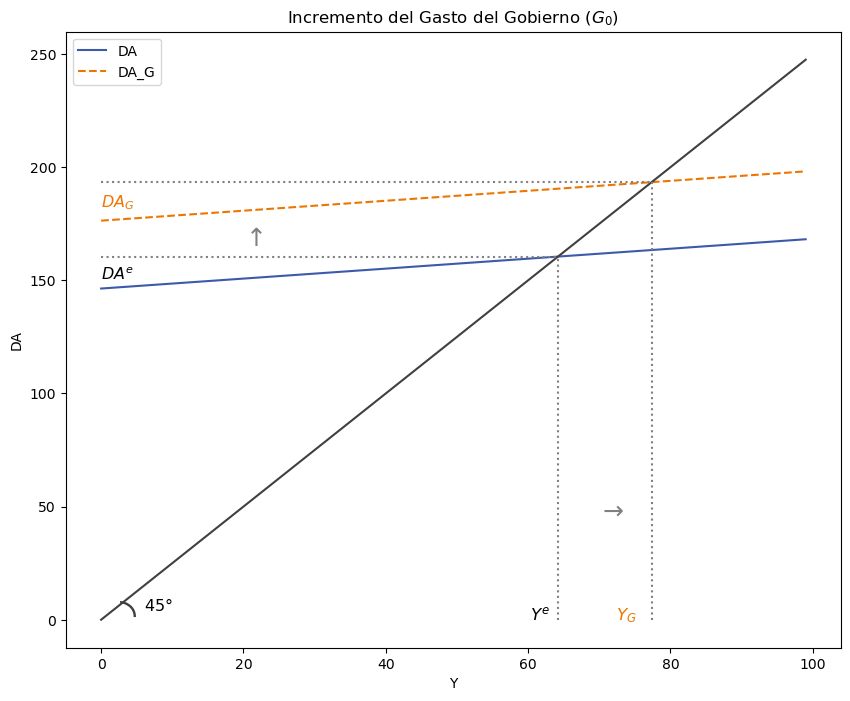

In [92]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
# Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax.plot([min(Y), E[1]], [E[0], E[0]], linestyle=":", color = "grey")
ax.plot([min(Y), E_1[1]],[E_1[0], E_1[0]], linestyle=":", color = "grey")

# Vertical
#Empieza el punto minimo hasta llegar al intercepto de manera vertical
ax.plot([E[1], E[1]], [min(L_45), E[0]], linestyle=':', color="grey")
ax.plot([E_1[1], E_1[1]], [min(L_45), E_1[0]], linestyle=':', color="grey")

# Texto agregado
plt.text(0, E[0]-10, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, E[0]+22, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(E[1]-4, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(E_1[1]-5, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(E_1[1]-7, E[1]-19, '$→$', fontsize = 18, color = 'grey')
plt.text(E[1]-44, E[0]+5, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Incremento del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

#### Analice una crisis mundial que reduce nuestras exportaciones $(M<0)$.

- Intuición: 

$$ ↓Xo → ↓DA → DA < Y → ↓Y $$

- Matemáticamente:

In [69]:
# Diferenciales

    # nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, g = symbols('Co Io Go Xo h r b m t g')

    # determinar ecuación
f = (Co + Io + Go + Xo - h*r)/(1 - (b - m)*(1 - t) + g)

    # función diferencial
df_Xo = diff(f, Xo) # diff(función, variable_analizar
df_Xo #∆Y/∆Go

1/(g - (1 - t)*(b - m) + 1)

Considernado el diferencial obtenido:

$$ \frac{∆Y}{∆X_0} = \frac{1}{1 - (b - m)(1 - t) + g} $$

Sabiendo que al multiplicador keynesiano $(k > 0)$ se le adiciona el parámetro $g$, el denominador continuará siendo positivo (aunque más grande y con una pendiente de curva reducida).

Y considerando que $∆X_0 < 0 $, la multiplicación de un número positivo con un negativo dará un negativo:

$$ \frac{∆Y}{(-)} = (+) $$
$$ ∆Y = (-)(+) $$
$$ ∆Y < 0 $$

- Gráficamente

In [93]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
g = 0.2 #solo valores entre 0-0.4
Xo = 15
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


# Nueva curva

Xo = 1

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_C_X = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


In [94]:
    # coordenadas de las curvas (x,y)
A = [DA_Cont[0], Y[0]] # DA, coordenada inicio
B = [DA_Cont[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

Equilibrio = line_intersection((A, B), (C, D))
Equilibrio # (y,x)

(174.7478070175439, 69.89912280701755)

In [95]:
    # coordenadas de las curvas (x,y)
A = [DA_C_X[0], Y[0]] # DA, coordenada inicio
B = [DA_C_X[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

Equilibrio_1  = line_intersection((A, B), (C, D))
Equilibrio_1 # (y,x)

(159.39692982456143, 63.75877192982457)

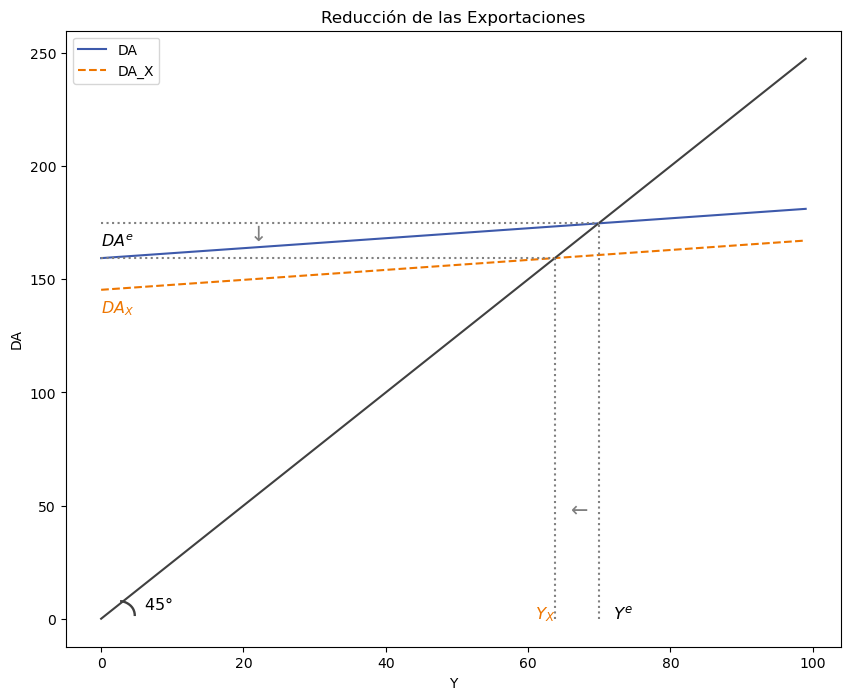

In [114]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_X, label = "DA_X", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
# Horizontal
#Empieza el punto minimo hasta llegar al intercepto de manera horizontal
ax.plot([min(Y), Equilibrio[1]], [Equilibrio[0], Equilibrio[0]], linestyle=":", color = "grey")
ax.plot([min(Y), Equilibrio_1 [1]],[Equilibrio_1 [0], Equilibrio_1 [0]], linestyle=":", color = "grey")

# Vertical
#Empieza el punto minimo hasta llegar al intercepto de manera vertical
ax.plot([Equilibrio[1], Equilibrio[1]], [min(L_45), Equilibrio[0]], linestyle=':', color="grey")
ax.plot([Equilibrio_1[1], Equilibrio_1[1]], [min(L_45), Equilibrio_1[0]], linestyle=':', color="grey")

# Texto agregado
plt.text(0, Equilibrio[0]-10, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, Equilibrio_1[0]-24, '$DA_X$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(Equilibrio[1]+2, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(Equilibrio[1]-9, 0, '$Y_X$', fontsize = 12, color = '#EE7600')
plt.text(Equilibrio[1]-4, Equilibrio_1[1]-18, '$←$', fontsize = 15, color = 'grey')
plt.text(Equilibrio_1[1]-43, Equilibrio_1[0]+8, '$↓$', fontsize = 15, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de las Exportaciones", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()